# Highest Earning US Census PUMA Location Analysis

### Introduction 

For this project, we are going to take a look at a US Census PUMA file that contains the average salaries for occupations and the number of employees by location. The other file contains a national average salary for every occupation. Before we proceed any further, however, it is important that we have a basic idea of what PUMA's are.

#### Background

The US Census's Public Use Microdata Areas or PUMAs for short are special statistical, geographic, non-overlapping grouping areas that contain no less than 100,000 people each. These PUMAs cover the entirety of the United States, Puerto Rico, and Guam. They are essential to researchers, policymakers, and other data professionals because PUMAs, being a smaller geographical unit, can provide far more in-depth data about the populations and communities that they are composed of.


## Project Outline

Our goal for this project, is to create an output that accomplishes the following tasks:

- **Display a unique PUMA location for each row**
- **Show the average salary of the entirety of said PUMA location**
- **A column for the highest-earning occupation for the PUMA location**
- **A column for the PUMA location's average salary of the above occupation*
- **A column for an occupaition's national US average wage**
- **This output/table should be ordered by the average location salary**


Also, after we are able to create this output, we should be able to answer the following questions:
- **What are the top ten highest PUMA locations in terms of average salary?**
- **Among the highest paid occupations, which ones are the most frequently recurring?**


Next, let's look at the data dictionaries for the tables.

### PUMA File Data Dictionary

- **puma_id:** The ID for a given PUMA location
- **puma_name:** The name of a PUMA area
- **occupation_id:** Occupation ID for a given occupation
- **occupation_name:** Occupation Name
- **total_population:** Total population of people for a given occupation in a PUMA area
- **average_wage:** Average wage for an occupation in a given PUMA area


### National Average File Data Dictionary

- **ID Detailed Occupation:** Occupation ID for a given occupation
- **Detailed Occupation:** Occupation Name
- **Average Wage:** National average wage for an occupation

Now let's dive into the analysis!

## Importing libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Define our functions


In [2]:
# Define functions for various purposes and streamline our code

# Function that loads reads in the csv files
def load_data(path):
    return pd.read_csv(path)
        
# Displays both the info and the head
def explore_data(dataset):
    dataset.info()
    return dataset.head() 
    
# A function to expedite selecting columns
def column_selecter(df, cols):
    df = df[cols]
    return df

# Used for easier column cleaning
def column_remapper(df, mapper):
    df = df.rename(mapper, axis=1, inplace=True)
    return df

# A function with the purpose of expediting indexing
def quick_filter(df, col, value):
    df = df[column_selecter(df, col) == value]
    return df

# A function for easily displaying a table in descending column
def descending(df, col):
    return df.sort_values(by=col, ascending=False)

# Code used to plot our visulization with numerical values for our bar
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [3]:
# Load the two datasets and store them as DataFrame objects
puma = load_data('pumas_occupations_num_employees.csv')
wages = load_data('occupations_avg_wage.csv')

In [4]:
# Explore at-a-glance info and the first five rows of the 'puma' dataset
explore_data(puma)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529202 entries, 0 to 529201
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   puma_id           529202 non-null  object 
 1   puma_name         529202 non-null  object 
 2   occupation_id     529202 non-null  object 
 3   occupation_name   529202 non-null  object 
 4   total_population  529202 non-null  int64  
 5   average_wage      529202 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 24.2+ MB


puma_id                      puma_name occupation_id  \
0  79500US1205701  Tampa City (Central) PUMA, FL        111021   
1  79500US1205701  Tampa City (Central) PUMA, FL        1110XX   
2  79500US1205701  Tampa City (Central) PUMA, FL        112021   
3  79500US1205701  Tampa City (Central) PUMA, FL        112022   
4  79500US1205701  Tampa City (Central) PUMA, FL        113012   

                    occupation_name  total_population   average_wage  
0     General & operations managers               303  216321.300330  
1    Chief executives & legislators               240   15787.429167  
2                Marketing managers               219   44594.771689  
3                    Sales managers               427   77892.215457  
4  Administrative services managers               153   30392.915033

In [5]:
# Check for null values in puma
puma.isnull().sum()

puma_id             0
puma_name           0
occupation_id       0
occupation_name     0
total_population    0
average_wage        0
dtype: int64

The `puma` dataset is quite large with 529,202 rows of data and 6 columns. It contains types of occupations in the `occupation_name` column, the population of each occupation in the `total_population` column, and the average wage of each occupation in the `average_wage` column. Since we can only see one location in the above output, we can imagine that we will see a lot of variation in the `average_wage` column. Also seeing as `total_population` doesn't seem to be that important for this particular analysis as it wasn't included in the final output that we are expected to produce. Also, there are no null values at all, which is quite surprising given the size of the dataset.

In [6]:
# Explore at-a-glance info and the first five rows of the 'wages' dataset
explore_data(wages)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Detailed Occupation  617 non-null    object 
 1   Detailed Occupation     617 non-null    object 
 2   Average Wage            617 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.6+ KB


ID Detailed Occupation                Detailed Occupation   Average Wage
0                 111021      General & operations managers   78932.012723
1                 1110XX     Chief executives & legislators  141283.836459
2                 112011  Advertising & promotions managers   68524.377437
3                 112020         Marketing & sales managers   88388.284736
4                 112021                 Marketing managers   84553.351153

In [7]:
# Checking for null values
wages.isnull().sum()

ID Detailed Occupation    0
Detailed Occupation       0
Average Wage              0
dtype: int64

So from what we can surmise from the `wages` dataset is that we have 3 columns and 617 different columns to work with. We know from earlier that `Average_Wage` in this column means the national average for an occupation of any given observation. This vague naming convention can cause confusion, so it would be helpful to rename it as soon as we can. Surprisingly enough, there are also no null values either.

We want to eventually merge the `wages` table with the `puma` column, so it'll be best to have some sort of consistency with our column-naming format. Since our `puma` table column names are already in the reliable snake case format, we'll also bring our `wages` table columns in line with that same format. Additionally, we'll also ensure that the `ID Detailed Occupation` and `Detailed Occupation` columns share the same name as their `wages` counterparts, as we can use these columns for seamless merging as they share common keys.

In [8]:
# Create a dictionary to remap the wages table columns
remap = {'ID Detailed Occupation' : 'occupation_id', 
          'Average Wage': 'national_average_wage', 
          'Detailed Occupation' : 'occupation_name' }

# Use our user-defined function to remap the columns
column_remapper(wages, remap)

In [9]:
# Check to see if the columns were successfully renamed
wages.columns

Index(['occupation_id', 'occupation_name', 'national_average_wage'], dtype='object')

Our columns are now renamed in snake case format and ready to undergo merging.

Since our task focuses on averages, we have to make certain that we don't have a lot of anomalies in our data, so let's take a look a the `puma` table and filter where `average_wage` = 0

In [10]:
# Using out user-defined function quick_filter to filter the puma dataset and store it in the zero_wages variable
zero_wages = quick_filter(puma, 'average_wage', 0)

In [11]:
# Display the filtered dataset 
zero_wages

puma_id                                          puma_name  \
16      79500US1205701                      Tampa City (Central) PUMA, FL   
50      79500US1205701                      Tampa City (Central) PUMA, FL   
84      79500US1205701                      Tampa City (Central) PUMA, FL   
89      79500US1205701                      Tampa City (Central) PUMA, FL   
111     79500US1205701                      Tampa City (Central) PUMA, FL   
...                ...                                                ...   
529124  79500US4804613  Between Loop I-610 & Beltway TX-8 PUMA, TX (79...   
529125  79500US4804613  Between Loop I-610 & Beltway TX-8 PUMA, TX (79...   
529134  79500US4804613  Between Loop I-610 & Beltway TX-8 PUMA, TX (79...   
529184  79500US4804613  Between Loop I-610 & Beltway TX-8 PUMA, TX (79...   
529194  79500US4804613  Between Loop I-610 & Beltway TX-8 PUMA, TX (79...   

       occupation_id                                    occupation_name  \
16            131022    Wholesale & retail buyers, except farm products   
50            211021           Child, family, and school social workers   
84            29112X  Other therapists, including exercise physiolog...   
89            292010    Clinical laboratory technologists & technicians   
111           333050                                    Police officers   
...              ...                                                ...   
529124        319094                          Medical transcriptionists   
529125        319095                                     Pharmacy aides   
529134        353041                        Food servers, nonrestaurant   
529184        499031                           Home appliance repairers   
529194        531000  Supervisors of transportation & material movin...   

        total_population  average_wage  
16                    91           0.0  
50                    61           0.0  
84                    49           0.0  
89                    52           0.0  
111                   33           0.0  
...                  ...           ...  
529124               112           0.0  
529125                31           0.0  
529134               111           0.0  
529184               294           0.0  
529194                96           0.0  

[45035 rows x 6 columns]

In [12]:
# Determining how much of our data we'll lose by dropping the 'zero_wages' rows
(zero_wages.shape[0] / puma.shape[0]) * 100

8.5099829554688

In the above two cells, we determined that 45,035 rows in `puma` have an `average_wage` of 0, and if we drop these, we'll lose just over 8.5% of our dataset. While it isn't ideal to drop these, our averages should be much more accurate if we drop this significant portion of data. And given that the `total_population` values for many of these rows are quite high, it doesn't make sense for `average_wage` to be 0.

In [13]:
# Drop all the indexes of the 'zero_wages' rows
puma = puma.drop(zero_wages.index)

In [14]:
# Check to see that the rows were dropped
puma.shape[0]

484167

After dropping all the `average_wage` rows with a value of 0, our `puma` dataset has decreased from 529,202 rows to 484,167 rows. Next, let's check for more erroneous figures in the `average_wage` column.

In [15]:
# Check the first 20000 rows from lowest to highest
puma.sort_values(by='average_wage', ascending=True)[:20000]

puma_id                                          puma_name  \
319245  79500US3402201                             Woodbury City PUMA, NJ   
322300  79500US3501002  Las Cruces, Mesilla Cities & University Park P...   
53457   79500US4203102                          Lansdale Borough PUMA, PA   
115061  79500US0804103           Colorado Springs City (Central) PUMA, CO   
526142  79500US5311605                    Duwamish & Beacon Hill PUMA, WA   
...                ...                                                ...   
9576    79500US0607704              Lodi, Ripon & Escalon Cities PUMA, CA   
52066   79500US3703102                Charlotte City (Northwest) PUMA, NC   
465877  79500US5311502     Peninsula Region & Tacoma City (West) PUMA, WA   
93097   79500US3604104         Bayside, Douglaston & Little Neck PUMA, NY   
354704  79500US3904101  Columbus (Far Northeast), Gahanna & New Albany...   

       occupation_id                                    occupation_name  \
319245        435021                              Couriers & messengers   
322300        372012                      Maids & housekeeping cleaners   
53457         113121                           Human resources managers   
115061        419010         Models, demonstrators, & product promoters   
526142        4520XX  Miscellaneous agricultural workers, including ...   
...              ...                                                ...   
9576          292034           Radiologic technologists and technicians   
52066         519030                                    Cutting workers   
465877        292056           Veterinary technologists and technicians   
93097         211012  Educational, guidance, and career counselors a...   
354704        359031  Hosts & hostesses, restaurant, lounge, & coffe...   

        total_population  average_wage  
319245               125      2.008000  
322300               789      2.567807  
53457                184      4.054348  
115061               174      5.936782  
526142               189      6.058201  
...                  ...           ...  
9576                 188   3039.292553  
52066                311   3039.292605  
465877               311   3039.292605  
93097                 41   3039.292683  
354704                82   3039.292683  

[20000 rows x 6 columns]

So looking at just the trends of just 20,000 rows in ascending order, we can see that there are more anomalies of low values in `average_wage`. Some of these could definitely be input errors, but some of these could be part-time or even seasonal positions as well. Since we just deleted almost 9% of our rows already, it would probably be best to just leave these values be for now and consult with our supervisors and/or the other data colleagues about deleting these values as well, or possibly imputing the median, mean, or even the national average. Cleaning data is also an iterative process as well!

Now in the next cell we are going to merge the `puma` and `wages` tables.

In [16]:
# Merging the two datasets on their common keys in 'occupation_id' and 'occupation_name'
combined = pd.merge(puma, wages, how='left', on=['occupation_id', 'occupation_name'])

In [17]:
# Exploring the data using our user-defined function
explore_data(combined)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484167 entries, 0 to 484166
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   puma_id                484167 non-null  object 
 1   puma_name              484167 non-null  object 
 2   occupation_id          484167 non-null  object 
 3   occupation_name        484167 non-null  object 
 4   total_population       484167 non-null  int64  
 5   average_wage           484167 non-null  float64
 6   national_average_wage  484167 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 29.6+ MB


puma_id                      puma_name occupation_id  \
0  79500US1205701  Tampa City (Central) PUMA, FL        111021   
1  79500US1205701  Tampa City (Central) PUMA, FL        1110XX   
2  79500US1205701  Tampa City (Central) PUMA, FL        112021   
3  79500US1205701  Tampa City (Central) PUMA, FL        112022   
4  79500US1205701  Tampa City (Central) PUMA, FL        113012   

                    occupation_name  total_population   average_wage  \
0     General & operations managers               303  216321.300330   
1    Chief executives & legislators               240   15787.429167   
2                Marketing managers               219   44594.771689   
3                    Sales managers               427   77892.215457   
4  Administrative services managers               153   30392.915033   

   national_average_wage  
0           78932.012723  
1          141283.836459  
2           84553.351153  
3          106611.873312  
4           65180.529338

In [18]:
# No duplicates!!!!
combined.duplicated(subset=None, keep='first').sum()

0

Now we're going to split our new `combined` table into a new table that will group every observation of `puma_name` location by the average wage for its entire location.

In [19]:
# Prepare our new dataset for the final merge
avg_loc_wage = combined.groupby('puma_name')['average_wage'].mean()

In [20]:
# Reset the index to use puma_name to merge to another table
avg_loc_wage = avg_loc_wage.reset_index()

# Display the results
avg_loc_wage

puma_name  average_wage
0             Aberdeen & Havre de Grace Cities PUMA, MD  51855.896073
1                  Acadia & Vermilion Parishes PUMA, LA  40127.365161
2                                     Ada City PUMA, OK  34377.574320
3        Adams & Franklin (Southeast) Counties PUMA, PA  44607.417130
4     Adams, Pike, Brown, Schuyler & Mason Counties ...  42319.280174
...                                                 ...           ...
2373  York County (West & Outside Rock Hill City) PU...  48644.497888
2374                             York Township PUMA, IL  55887.624098
2375    Youngstown City, Boardman & Austintown PUMA, OH  36766.854531
2376                                 Yuba City PUMA, CA  44065.849315
2377                                 Yuma City PUMA, AZ  37240.106092

[2378 rows x 2 columns]

We have now prepared our `avg_loc_wage` for merging, so now we're going to create another table that will contain the highest paid occupation of a location, along with its average location wage and its national wage.

In [21]:
highest_paid_per_location = (
    combined.                                                # Sort by average wages
    sort_values(by='average_wage', ascending=False).         # In descending order
    groupby('puma_name').                                    # Group by puma_name
    head(1)                                                  # Use head(1) to select the first observation
    [['puma_id',                                             # In each group ordered by 'average_wage'
      'puma_name',
      'average_wage', 'occupation_name','national_average_wage' ]]
)

In [22]:
# View the table to ensure that everything looks ok
highest_paid_per_location

puma_id                                          puma_name  \
109249  79500US0900102                Stamford & Greenwich Towns PUMA, CT   
112023  79500US0900500                         Litchfield County PUMA, CT   
109473  79500US0900103          Norwalk, Westport & Darien Towns PUMA, CT   
108475  79500US0900100  Danbury, Ridgefield, Bethel, Brookfield, New F...   
110306  79500US0900300                   Hartford County (North) PUMA, CT   
...                ...                                                ...   
129645  79500US2603210                  Detroit City (Northeast) PUMA, MI   
473802  79500US7200701                          Carr 3 (Sureste) PUMA, PR   
474927  79500US7200401                              Carr 2 (Sur) PUMA, PR   
468537  79500US7200301                            Carr 2 (Norte) PUMA, PR   
473576  79500US7200601                         Carr 156-Carr 164 PUMA, PR   

         average_wage                                    occupation_name  \
109249  727403.649123                                           Surgeons   
112023  727403.642857                      Music directors and composers   
109473  727403.641791           Magnetic resonance imaging technologists   
108475  727403.636364                        Other financial specialists   
110306  727403.629630                                          Actuaries   
...               ...                                                ...   
129645   76283.189358                                Teaching assistants   
473802   75982.283333        Broadcast announcers and radio disc jockeys   
474927   72364.071429                                        Pharmacists   
468537   71929.889381                                Purchasing managers   
473576   56733.428571  Miscellaneous engineers, including nuclear eng...   

        national_average_wage  
109249          282720.324022  
112023           34240.478550  
109473          100650.600253  
108475           98080.728621  
110306          131082.881820  
...                       ...  
129645           17811.086021  
473802           47494.133615  
474927           88632.346881  
468537           74013.096568  
473576           86422.791948  

[2378 rows x 5 columns]

We now have an observation for the highest paid occupation every location in `puma_name`. Now we will merge the tables and we can choose between either `puma_id` or `puma_name`, but let's use `puma_name.

In [23]:
# Merge 'avg_loc_wage' and `highest_paid_per_location` to get our near final output
final_table = pd.merge(avg_loc_wage, highest_paid_per_location, on='puma_name')

In [24]:
# Displays the near-finished output that was requested of us
final_table

puma_name  average_wage_x  \
0             Aberdeen & Havre de Grace Cities PUMA, MD    51855.896073   
1                  Acadia & Vermilion Parishes PUMA, LA    40127.365161   
2                                     Ada City PUMA, OK    34377.574320   
3        Adams & Franklin (Southeast) Counties PUMA, PA    44607.417130   
4     Adams, Pike, Brown, Schuyler & Mason Counties ...    42319.280174   
...                                                 ...             ...   
2373  York County (West & Outside Rock Hill City) PU...    48644.497888   
2374                             York Township PUMA, IL    55887.624098   
2375    Youngstown City, Boardman & Austintown PUMA, OH    36766.854531   
2376                                 Yuba City PUMA, CA    44065.849315   
2377                                 Yuma City PUMA, AZ    37240.106092   

             puma_id  average_wage_y  \
0     79500US2400602   162095.513158   
1     79500US2201100   180331.267606   
2     79500US4000702   323841.389381   
3     79500US4203701   492365.162791   
4     79500US1700300   389976.986175   
...              ...             ...   
2373  79500US4500501   426513.835664   
2374  79500US1703205   550111.681818   
2375  79500US3901500   208817.426606   
2376  79500US0610100   572399.818182   
2377  79500US0400700   417395.972222   

                                      occupation_name  national_average_wage  
0                                 Aerospace engineers           93327.564278  
1                                   Data entry keyers           23049.434304  
2                      Chief executives & legislators          141283.836459  
3                                            Surgeons          282720.324022  
4                                          Physicians          206831.792909  
...                                               ...                    ...  
2373                                    Veterinarians           84868.116629  
2374                    Information security analysts           99255.283120  
2375  Exercise trainers and group fitness instructors           18557.758449  
2376                                         Surgeons          282720.324022  
2377                  Diagnostic medical sonographers           73862.487325  

[2378 rows x 6 columns]

The final output is nearly ready, but first, we are going to take the time to clean it up a bit. We have to rename our columns into names that are more representative of the values that they store. We are also going to drop `puma_id` as well since we no longer need it, as we won't be doing any further mergers. We will also reorganize the column order a bit using the `reindex` function. After that, we will get rid of the `PUMA`in the puma_name column and reduce any excess whitespace. Lastly, we will round all numerical values to 2 decimal places, instead of the current 6, and we will then display the table with `location_avg_wage` in descending order.

In [25]:
# Drop the 'puma_id' column
final_table = final_table.drop('puma_id', axis=1)

# Mapping dictionary to change column names
mapping= {'puma_name': 'location_name(PUMA)', 
          'average_wage_x':'location_avg_wage',
         'occupation_name' :'highest_wage_occupation(per_location)', 
         'average_wage_y':'highest_salary(per_location)', 
          'national_average_wage':'avg_national_wage'}

# Remapping the column names using our user-built function 'column_remapper'
column_remapper(final_table, mapping)

# Prepare a list to use for our reindexing of the column order
swap_cols = (['location_name(PUMA)',
              'location_avg_wage',
              'highest_wage_occupation(per_location)', 
              'highest_salary(per_location)','avg_national_wage'])

# Reindex (Swap) the orders of the columns
final_table = final_table.reindex(columns=swap_cols)

# Get rid of PUMA and clean any excess whitespace that its removal caused
final_table['location_name(PUMA)'] = final_table['location_name(PUMA)'].str.replace('PUMA', '').str.replace(' ,', ',')

# Round all numerical values to 2 decimal places
final_table = round(final_table, 2)

# Use another user-built function to display our table by average location salary descending
final_table = descending(final_table, 'location_avg_wage')

# The Final Output

In [26]:
# Display our completed table
final_table

location_name(PUMA)  location_avg_wage  \
1014                        Inner Mission & Castro, CA          105555.59   
120    Battery Park City, Greenwich Village & Soho, NY          100693.52   
512    Cupertino, Saratoga Cities & Los Gatos Town, CA           99781.54   
375   Chelsea, Clinton & Midtown Business District, NY           99672.18   
2207                               Upper East Side, NY           93607.96   
...                                                ...                ...   
308                                Carr 2-Carr 111, PR           21839.44   
304                                 Carr 2 (Norte), PR           20125.75   
306                              Carr 2 (Suroeste), PR           20027.66   
302                              Carr 156-Carr 164, PR           18376.74   
305                                   Carr 2 (Sur), PR           18200.83   

                  highest_wage_occupation(per_location)  \
1014                                           Surgeons   
120                                            Dentists   
512                      Industrial production managers   
375                         Other financial specialists   
2207                                           Dentists   
...                                                 ...   
308                                 Software developers   
304                                 Purchasing managers   
306                                         Pharmacists   
302   Miscellaneous engineers, including nuclear eng...   
305                                         Pharmacists   

      highest_salary(per_location)  avg_national_wage  
1014                     572399.82          282720.32  
120                      668644.00          127707.80  
512                      572399.80           77305.98  
375                      668644.03           98080.73  
2207                     668644.00          127707.80  
...                            ...                ...  
308                      182357.45          105223.47  
304                       71929.89           74013.10  
306                      182357.45           88632.35  
302                       56733.43           86422.79  
305                       72364.07           88632.35  

[2378 rows x 5 columns]

Now with our table completed let's move on to the two questions:

- **What are the top ten highest PUMA locations in terms of average salary?**
- **Among the highest paid occupations, which ones are the most frequently recurring?**

## What are the top ten highest PUMA locations in terms of average salary?

To achieve this visualization, we are going to make a horizontal bar graph. The vertical axis for this graph will be the PUMA location and the horizontal axis will be the average location salary.

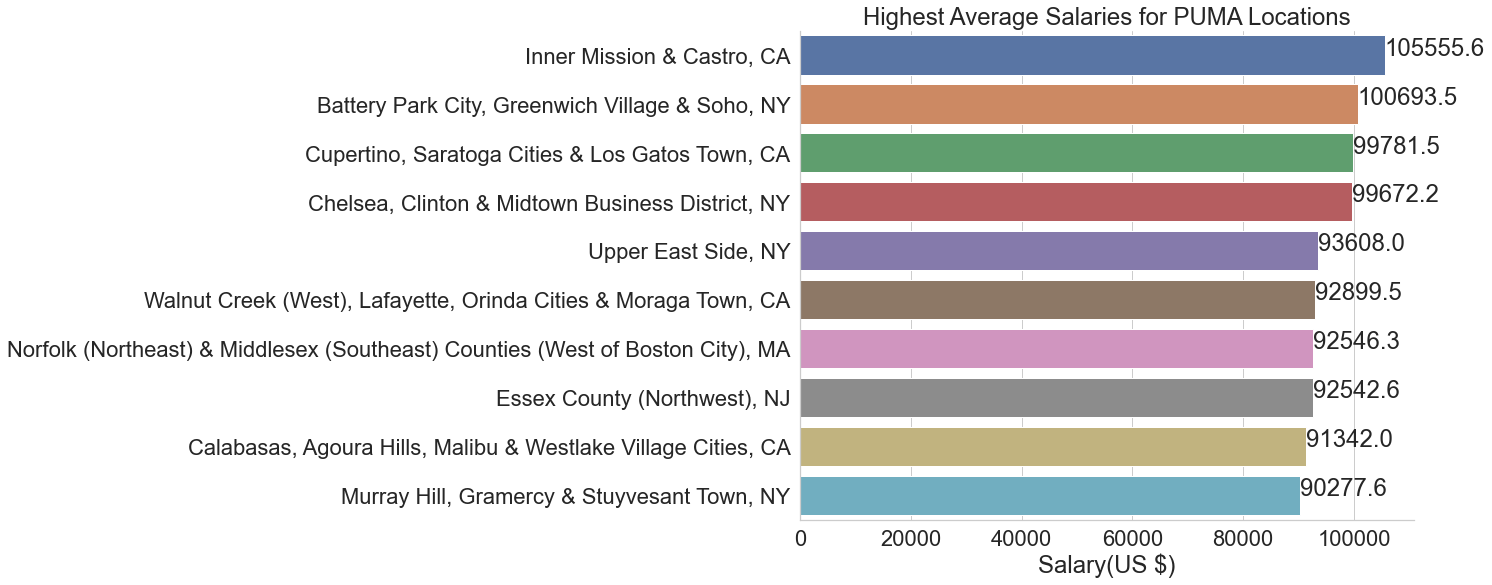

In [27]:
# Set the canvas size
plt.figure(figsize=(11,9))

# Increase the universal font size
sns.set(font_scale=2)

# Set the background style
sns.set_style("whitegrid")

# Plot the first 10 rows of our final table
p = sns.barplot(data=final_table[:10], y='location_name(PUMA)', x='location_avg_wage')

# Use a user defined function to plot the bar chart
show_values(p, 'h', space=1)

# Set label information
p.set(ylabel=None, xlabel='Salary(US $)', title ='Highest Average Salaries for PUMA Locations')

# Take off the top and right spines
sns.despine()

# Complete the plot
plt.show()

## Among the highest paid occupations, which ones are the most frequently recurring?

For this visualization, we will make a pie graph and it will be organized by the top five occupations that appear the most frequently in our `final_table` output. We will use text labels as well as color labels to distinguish the different occupations and label each one with a percentage value. We will also present the national average salary for each occupation with a text label as well.

*This pie chart was created in Tableau*

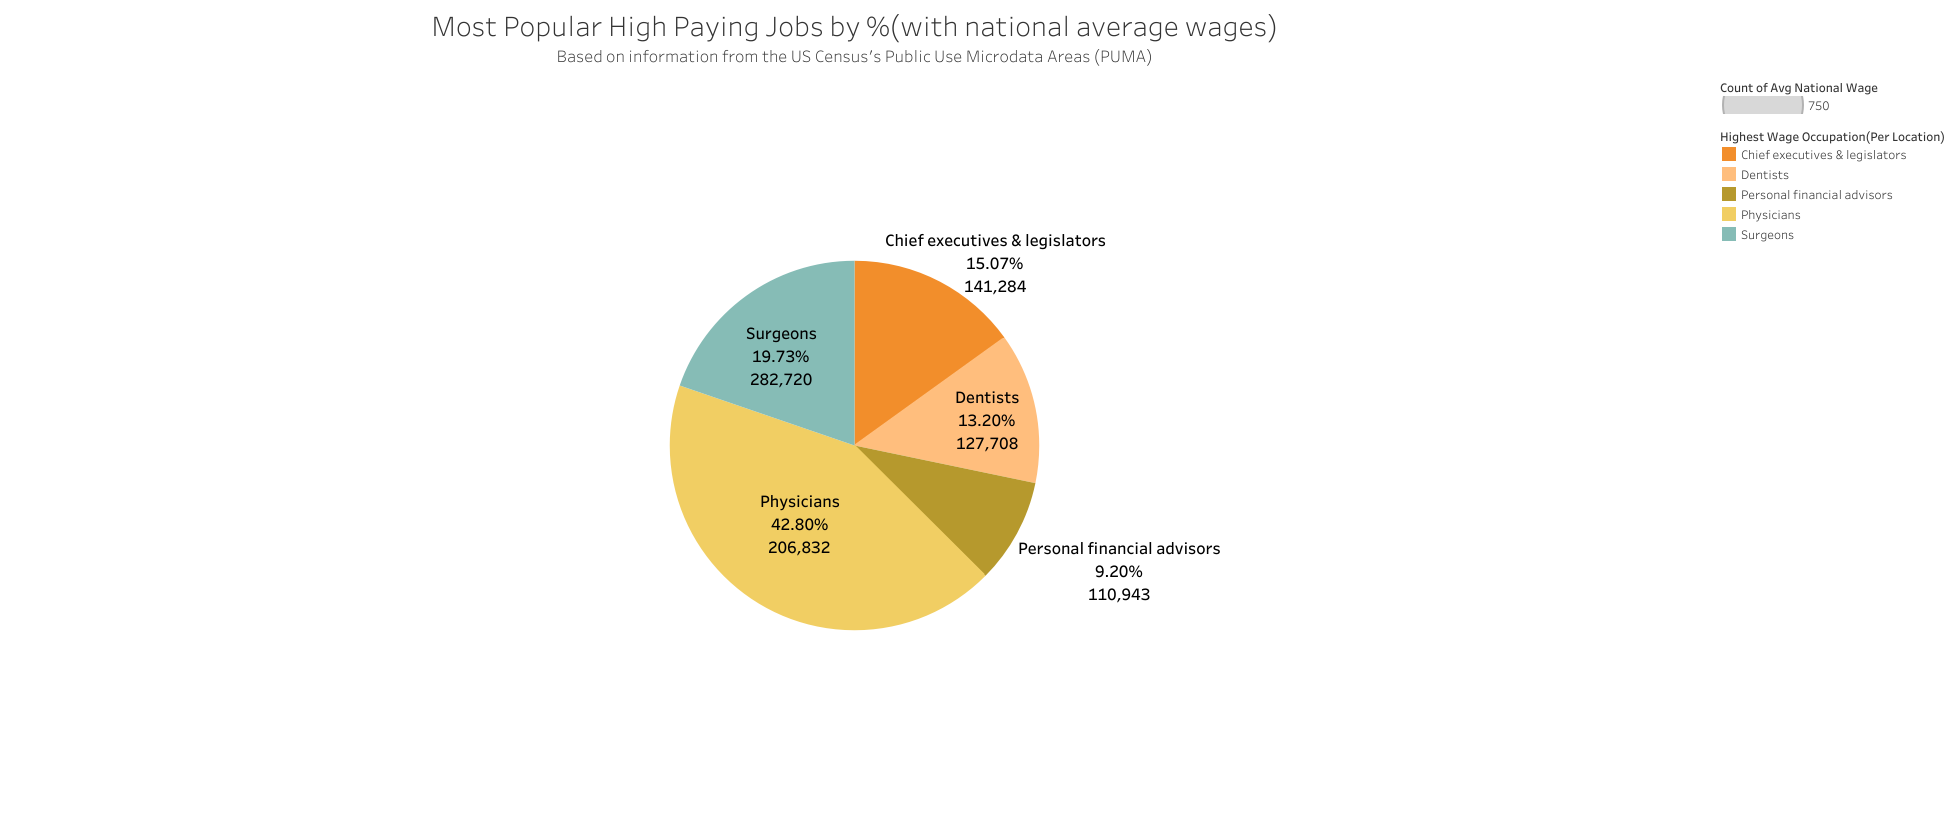